# **Spam email classification using NLP and machine learning**
An email spam detection system leverages Machine Learning techniques, specifically Natural Language Processing (NLP), and Python to identify spam emails. This system utilizes a dataset containing numerous email samples, extracts important words or features, and employs a Naive Bayes classifier to determine whether an email is spam or not.

### **Libraries**

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goldy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Project Flow**

1. **Scoping**  
   Define the project problem: the goal is to use Machine Learning and Natural Language Processing (NLP) techniques to classify emails as spam or not spam based on the provided dataset.

2. **The Data**  
   This phase involves analyzing and preparing the dataset for training by following these steps:  
   - **Data Loading**: Load the email dataset into the working environment.  
   - **Data Visualization**: Explore the dataset to understand patterns, trends, and potential outliers.  
   - **Data Cleaning**: Preprocess the data by removing duplicates, null values, and unnecessary characters, and tokenize the text.  
   - **Data Splitting**: Split the dataset into training and testing subsets to evaluate model performance effectively.

3. **The Model**  
   Develop and train a Machine Learning model using the processed dataset:  
   - Use NLP techniques to extract features, such as important words or n-grams.  
   - Train a Naive Bayes classifier on the training data.  
   - Test and evaluate the model to ensure accuracy in detecting spam emails.


##### **1. Data Loading**

In [2]:

dataset = pd.read_csv('dataset/emails.csv')
dataset.shape

(5728, 2)

In [3]:

dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:

dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


##### **2. Data Visualization**


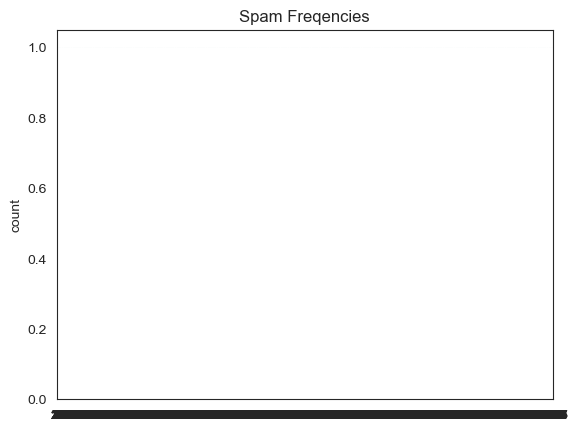

In [6]:

plt.figure(dpi=100)
sns.countplot(dataset['spam'])
plt.title("Spam Freqencies")
plt.show()

##### **3. Data Cleaning**

In [7]:

dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:

dataset.drop_duplicates(inplace=True)

In [9]:

def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [10]:


vectorizer = CountVectorizer(analyzer=process)
vectorizer.fit(dataset['text']) 

message = vectorizer.transform(dataset['text'])



In [11]:

with open("models/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


##### **4. Data Splitting**

In [12]:

X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

## **3. The Model**

In [13]:

model = MultinomialNB()

In [14]:

model.fit(X_train, y_train)

MultinomialNB()

In [15]:

dump(model, open("models/model.pkl", 'wb'))

In [16]:

y_pred = model.predict(X_test)

In [17]:

accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [18]:

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       870\n           1       0.97      1.00      0.98       269\n\n    accuracy                           0.99      1139\n   macro avg       0.98      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

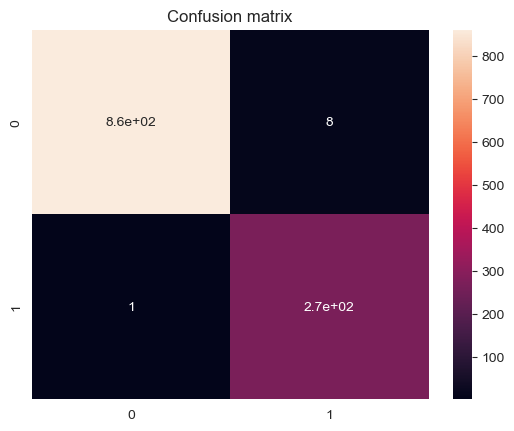

In [19]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [23]:
import pickle

with open("models/vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("models/model.pkl", "rb") as f:
    model = pickle.load(f)

raw_data = ["respected sir/mam, this is to inform you the last date of registration of  "]

input_data = vectorizer.transform(raw_data)

predictions = model.predict(input_data)
# 1 spam
# 0 not spam
print(model.classes_)
print("Predictions:", predictions)


[0 1]
Predictions: [0]
